## Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Amélioration qualité Corpus

---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd

### Chargement des données

In [11]:
import patat.util.text

In [3]:
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb()
article_db.df()

,url,title,article,site,author,date_iso,url_h
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,reseauinternational.net,NaN,2022-09-30T00:00:00,f95a294c94ff76cc9626ae06300a8b38067f89cf
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",reseauinternational.net,NaN,2022-09-30T00:00:00,c924dab7ded47578d81c3ae46f8be0964b3c50f1
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,lemediaen442.fr,NaN,2022-09-29T00:00:00,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",www.francesoir.fr,Auteur(s)\nFranceSoir,2022-09-28T13:15:00,0c0341a1f5fae820ee307cb54024df6b06a93d85
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",www.breizh-info.com,NaN,2022-09-27T00:00:00,fcce819327d0302c4cf5e3a8a43b54327ffb8e63
...,...,...,...,...,...,...,...
87179,https://www.profession-gendarme.com/zelensky-e...,Zelensky est « une marionnette qui fait inutil...,Encore un journaliste surpris qu’un colonel am...,www.profession-gendarme.com,NaN,NaN,e346761c2a99d892b26c9388480e0ee6ad6b303b
87180,https://www.profession-gendarme.com/zelensky-l...,Zélensky : l’arnaque de la contre-offensive uk...,Le président Zelensky et ses alliés de l’Otan ...,www.profession-gendarme.com,NaN,NaN,77525354644316eadab53960efa8f5fd028c7f67
87181,https://www.profession-gendarme.com/zelensky-m...,Zelensky massacre maintenant des citoyens ukra...,ZELENSKY A ORDONNÉ QUE TOUTES LES PERSONNES FU...,www.profession-gendarme.com,NaN,NaN,fc6a074da5c02032bc9fc3f35f1044bc4029042c
87182,https://www.profession-gendarme.com/zero-mort-...,Zéro mort du coronavirus : comment expliquer l...,Le Vietnam est une exception dans le monde : a...,www.profession-gendarme.com,NaN,NaN,e4f0a8961d79c9a5f66c80d7aa4196cb679af2b0


## Expérience
---

### Etape 1

In [16]:
df = article_db.df().copy()

In [17]:
import re

In [18]:
def print_article(i):
    print(df['url'][i])
    print(df['title'][i])
    print(df['article'][i])

In [19]:
print_article(203)

https://www.francesoir.fr/opinions-entretien/jean-marc-sabatier-oxyde-graphene-vaccins-anomalies-sanguines-nanoparticules-lipidiques
Oxyde de graphène dans les vaccins, anomalies sanguines, nanoparticules lipidiques: l'analyse de Jean-Marc Sabatier
ENTRETIEN — Que savons-nous des troubles de la coagulation sanguine qui peuvent se retrouver chez les personnes infectées par le Covid-19, mais également chez une personne non-infectée après une ou plusieurs injections vaccinales ? Comment expliquer les formations en rouleaux de globules rouges dans les échantillons de sang observés au microscope, notamment chez les personnes vaccinées ? Quelles seraient les conséquences de la présence d’oxyde de graphène si la présence de ce matériau dans les vaccins à ARNm venait à être confirmée ? Les injections vaccinales peuvent-elles provoquer des modifications durables dans la composition du sang des vaccinés ? Quel est le rôle de nanoparticules lipidiques (NPL) ? Que savons-nous des effets délétères 

In [20]:
df['char_count']=df['article'].apply(len)

In [21]:
importlib.reload(patat.util.text)

<module 'patat.util.text' from '/Users/fm/Desktop/Work/Patat/patat/util/text.py'>

In [22]:
df['word_count']=df['article'].apply(lambda text : len(patat.util.text.get_words(text)))

In [24]:
import seaborn as sns


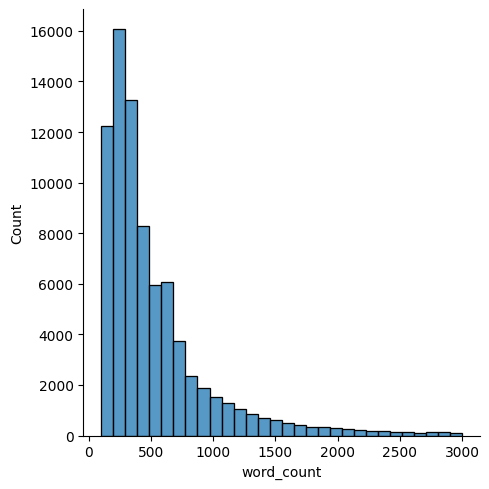

In [48]:
sns.displot(df, x="word_count",bins=30)

In [43]:
df = df[df['word_count']<3000]

In [47]:
df = df[df['word_count']>100]

In [50]:
df.shape

(79387, 9)

In [52]:
df[df['title'].duplicated()]

,url,title,article,site,author,date_iso,url_h,char_count,word_count
44,https://www.cnews.fr/france/2022-09-24/grenobl...,Grenoble : le maire écologiste Eric Piolle en ...,Le maire Europe Écologie-Les Verts (EELV) de G...,www.cnews.fr,Par \n\n\nCNEWS avec AFP,2022-09-26T08:44:00,f43371434664428e3c9d556f57647dea32ff78be,1906,280
170,https://www.wikistrike.com/2022/09/onu-le-mali...,ONU : Le Mali a les preuves que la France four...,"Le colonel Abdoulaye Maïga, Premier ministre i...",www.wikistrike.com,NaN,2022-09-26T00:00:00,3b5126a4a45adf353a8282535127b216a404aaf9,2122,320
320,https://www.lelibrepenseur.org/temoignage-puis...,La dictature sanitaire est en fait une dictatu...,Voici l’histoire d’une gamine qui a été mutilé...,www.lelibrepenseur.org,Par\nAguellid,2022-09-25T00:00:00,90f7ba5ade6f094429b9f1169c516fab2b5492bc,3372,515
328,https://www.lelibrepenseur.org/la-dictature-sa...,La dictature sanitaire est en fait une dictatu...,C‘est une analyse que devrait faire n’importe ...,www.lelibrepenseur.org,Par\nAguellid,2022-09-25T00:00:00,7e63c5a0c8eda95645a9da44534d833760f07c26,1176,186
354,https://www.lelibrepenseur.org/rechauffement-c...,La dictature sanitaire est en fait une dictatu...,Il va être extrêmement compliqué pour le systè...,www.lelibrepenseur.org,Par\nAguellid,2022-09-25T00:00:00,5bf53cb89aa1b5aaa834ca73f2a67632ff2b8182,1061,167
...,...,...,...,...,...,...,...,...,...
86935,https://www.profession-gendarme.com/un-policie...,Un policier de l’Essonne a mis fin à ses jours,Johan B. policier au Centre de Rétention Admin...,www.profession-gendarme.com,NaN,NaN,8c68b0d3d9eb4f9aad0471acf35355df082d8ad9,2039,252
86964,https://www.profession-gendarme.com/un-sondage...,Un sondage défavorable pour Emmanuel Macron su...,"Des internautes, dont des politiques, ont affi...",www.profession-gendarme.com,NaN,NaN,5e444e16059961726ef111e6babae40f1093b792,7330,1076
87030,https://www.profession-gendarme.com/urgent-des...,"Urgent : des officiers supérieurs américains, ...",Publié le 7 mai 2022\n\nDes officiers supérieu...,www.profession-gendarme.com,NaN,NaN,f0c95a993e334b2a65ced681deee43e410acbf3d,1210,180
87077,https://www.profession-gendarme.com/variole-du...,Variole du singe: la fiction apocalyptique ima...,Publié le 27/05/2022 à 19:32\nl’ONG américaine...,www.profession-gendarme.com,NaN,NaN,13744439568264b8aaafd78f82214af9b52fa9a2,7804,1152


In [37]:
df['url'][17880]

'https://www.dreuz.info/2022/03/la-russie-declenche-les-hostilites-contre-le-monde-libre-fil-info-en-continu-259628.html'

In [36]:
print_article(17880)

https://www.dreuz.info/2022/03/la-russie-declenche-les-hostilites-contre-le-monde-libre-fil-info-en-continu-259628.html
Mise à jour jusqu’au 10 avril 2022 : Invasion de l’Ukraine
Kharkiv: L'ampleur de la destruction augmente chaque jour. Le montant des réparations à payer par la Russie est inimaginable.

Mise en garde : Malheureusement, nous avons dû modifier le titre de fil information, qui devient - merci au pacifiste Biden et l'idéologie de gauche de son entourage - "la guerre russo-ukrainienne de 2022". 
Une partie de cette guerre se porte sur la propagande, elle existe des deux cotés. Des fausses vidéos, des fausses images et des fausses déclarations vont être diffusées, et dans le flot en continu, il se peut hélas, malgré toutes nos précautions pour les éliminer, que cela se produise ici. 
Il n'est pas possible à la fois de publier un fil en continu, et de confirmer et valider toutes les informations. Nous avons choisi le fil en continu, car nous nous fions à des sources extrêmem

In [53]:
df = df.drop_duplicates('title')

In [54]:
df = df.drop_duplicates('article')

In [55]:
df = df.drop_duplicates('url')

In [61]:
df

,url,title,article,site,author,date_iso,url_h,char_count,word_count
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,reseauinternational.net,NaN,2022-09-30T00:00:00,f95a294c94ff76cc9626ae06300a8b38067f89cf,10366,1576
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",reseauinternational.net,NaN,2022-09-30T00:00:00,c924dab7ded47578d81c3ae46f8be0964b3c50f1,1607,239
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,lemediaen442.fr,NaN,2022-09-29T00:00:00,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb,1444,215
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",www.francesoir.fr,Auteur(s)\nFranceSoir,2022-09-28T13:15:00,0c0341a1f5fae820ee307cb54024df6b06a93d85,4040,591
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",www.breizh-info.com,NaN,2022-09-27T00:00:00,fcce819327d0302c4cf5e3a8a43b54327ffb8e63,1145,167
...,...,...,...,...,...,...,...,...,...
87178,https://www.profession-gendarme.com/zelensky-a...,Zelensky a trouvé un milliard de dollars et un...,"Dimanche, 06 Mars 2022 – 12h00\nLes enquêteurs...",www.profession-gendarme.com,NaN,NaN,c0f83f91c5c73c4afbe1f6dd15ac6d3dff92811d,2417,348
87180,https://www.profession-gendarme.com/zelensky-l...,Zélensky : l’arnaque de la contre-offensive uk...,Le président Zelensky et ses alliés de l’Otan ...,www.profession-gendarme.com,NaN,NaN,77525354644316eadab53960efa8f5fd028c7f67,9185,1399
87181,https://www.profession-gendarme.com/zelensky-m...,Zelensky massacre maintenant des citoyens ukra...,ZELENSKY A ORDONNÉ QUE TOUTES LES PERSONNES FU...,www.profession-gendarme.com,NaN,NaN,fc6a074da5c02032bc9fc3f35f1044bc4029042c,1248,199
87182,https://www.profession-gendarme.com/zero-mort-...,Zéro mort du coronavirus : comment expliquer l...,Le Vietnam est une exception dans le monde : a...,www.profession-gendarme.com,NaN,NaN,e4f0a8961d79c9a5f66c80d7aa4196cb679af2b0,7518,1165


In [60]:
df[df['title'].apply(lambda title : re.match(r'Sophie Conrad.*',title)!=None)]['url']

18235    https://www.lelibrepenseur.org/afp-continue-de...
Name: url, dtype: object

In [62]:
df.to_csv('data/corpus/221014-Articles.csv')

## Mesure et observation des résultats
---

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---